In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics


In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sukhmandeepsinghbrar/house-prices-india")

print("Path to dataset files:", path)

c:\Users\manga\Desktop\ml\numpy\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\manga\.cache\kagglehub\datasets\sukhmandeepsinghbrar\house-prices-india\versions\1


In [3]:
import os
# Step 2: Find the CSV file in the downloaded folder
csv_files = [f for f in os.listdir(path) if f.endswith('.csv')]

if csv_files:
    # Use the first CSV file found
    csv_path = os.path.join(path, csv_files[0])
    
    # Step 3: Read CSV into a pandas DataFrame
    df = pd.read_csv(csv_path)
    
    print("\nFirst 5 rows of the dataset:")
    print(df.head())
else:
    print("No CSV file found.")


First 5 rows of the dataset:
           id   Date  number of bedrooms  number of bathrooms  living area  \
0  6762810635  42491                   4                 2.50         2920   
1  6762810998  42491                   5                 2.75         2910   
2  6762812605  42491                   4                 2.50         3310   
3  6762812919  42491                   3                 2.00         2710   
4  6762813105  42491                   3                 2.50         2600   

   lot area  number of floors  waterfront present  number of views  \
0      4000               1.5                   0                0   
1      9480               1.5                   0                0   
2     42998               2.0                   0                0   
3      4500               1.5                   0                0   
4      4750               1.0                   0                0   

   condition of the house  ...  Built Year  Renovation Year  Postal Code  \
0   

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14619 entries, 0 to 14618
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     14619 non-null  int64  
 1   Date                                   14619 non-null  int64  
 2   number of bedrooms                     14619 non-null  int64  
 3   number of bathrooms                    14619 non-null  float64
 4   living area                            14619 non-null  int64  
 5   lot area                               14619 non-null  int64  
 6   number of floors                       14619 non-null  float64
 7   waterfront present                     14619 non-null  int64  
 8   number of views                        14619 non-null  int64  
 9   condition of the house                 14619 non-null  int64  
 10  grade of the house                     14619 non-null  int64  
 11  Ar

In [5]:
stats =df['Price'].describe().reset_index()
stats['Price']= round(df['Price'],2)
print(stats)


   index    Price
0  count  1400000
1   mean  1200000
2    std   838000
3    min   805000
4    25%   790000
5    50%   785000
6    75%   750000
7    max   750000


In [6]:
df.isna().sum().sum()

np.int64(0)

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [9]:
df.head()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
1,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
2,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
3,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
4,6762813105,42491,3,2.50,2600,4750,1.0,0,0,4,...,1951,0,122007,52.9133,-114.590,2380,4750,1,67,790000


In [10]:
df.groupby('condition of the house')['Price'].mean().sort_values(ascending=False)

condition of the house
5    609954.024276
3    539336.477968
4    521082.494579
2    312891.400000
1    285497.222222
Name: Price, dtype: float64

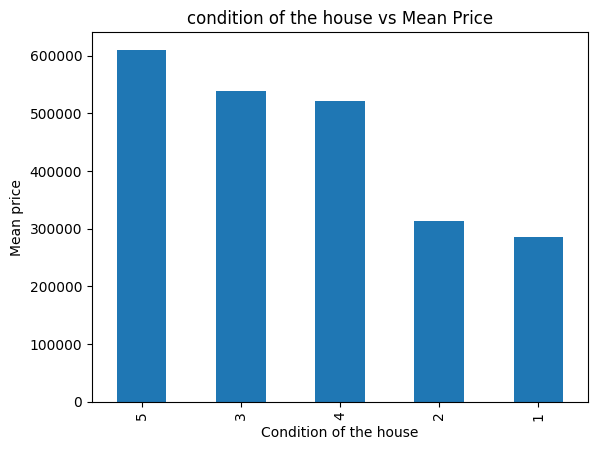

In [11]:
df.groupby('condition of the house')['Price'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('condition of the house vs Mean Price')
plt.xlabel('Condition of the house')
plt.ylabel('Mean price')
plt.show()

In [12]:
df.columns

Index(['id', 'Date', 'number of bedrooms', 'number of bathrooms',
       'living area', 'lot area', 'number of floors', 'waterfront present',
       'number of views', 'condition of the house', 'grade of the house',
       'Area of the house(excluding basement)', 'Area of the basement',
       'Built Year', 'Renovation Year', 'Postal Code', 'Lattitude',
       'Longitude', 'living_area_renov', 'lot_area_renov',
       'Number of schools nearby', 'Distance from the airport', 'Price'],
      dtype='object')

In [13]:
x= df[['number of bedrooms', 'number of bathrooms','living area','condition of the house','Number of schools nearby']]
y=df[['Price']]
y
x

,number of bedrooms,number of bathrooms,living area,condition of the house,Number of schools nearby
0,4,2.50,2920,5,2
1,5,2.75,2910,3,1
2,4,2.50,3310,3,3
3,3,2.00,2710,4,1
4,3,2.50,2600,4,1
...,...,...,...,...,...
14614,2,1.50,1556,4,3
14615,3,2.00,1680,4,3
14616,2,1.00,1070,3,2
14617,4,1.00,1030,4,3


In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)
print(x.shape, X_train.shape, X_test.shape)

(14619, 5) (11695, 5) (2924, 5)


In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

In [31]:
param_grid={
    "criterion":["mse","friedman_mse","mae"],
    "splitter":["best","random"],
    "max_depth":[None ,10,20,30,40,50],
    "min_samples_split":[2,5,10],
    "min_samples_leaf":[1,2,4]
}

In [32]:
tree_model = DecisionTreeRegressor()
grid_tree = GridSearchCV(estimator = tree_model , param_grid= param_grid)
grid_tree.fit(X_train,Y_train)

c:\Users\manga\Desktop\ml\numpy\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
1080 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\manga\Desktop\ml\numpy\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\manga\Desktop\ml\numpy\.venv\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "c:\Users\manga\Desktop\ml\numpy\.venv\Lib\site-packages\sklearn\base.py", line 436, in _validate_params
    validate_parameter_constra

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'friedman_mse', 'mae'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [33]:
grid_tree.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 10,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'splitter': 'random'}

In [35]:
tree_pred = grid_tree.predict(X_test)
from sklearn.metrics import mean_squared_error
mse= mean_squared_error(Y_test, tree_pred)
mse

71476551919.96082

In [37]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,Y_train)
lr_pred= lr.predict(X_test)

mse1 = mean_squared_error(Y_test,lr_pred)
mse1

71107399832.00502